# Self-Balancing Scooter Control

![](images/self-balancing-scooter.png)

> A self-balancing scooter [...] is a self-balancing personal transporter consisting of two motorized wheels connected to a pair of articulated pads on which the rider places their feet. The rider controls the speed by leaning forward or backward, and direction of travel by twisting the pads.
>
> Source: <https://en.wikipedia.org/wiki/Self-balancing_scooter>

### Python Dependencies

In [ ]:
from numpy import *
from numpy.linalg import *

from scipy.linalg import *
from scipy.integrate import *
from scipy.signal import *

import matplotlib.pyplot as plt


Step 1 - Scooter Planar Model
================================

### Introduction

We consider a simple model of a self-balancing scooter evolving in the plane. It is mainly made of

  - The frame that contains the two articulated pads; from above, each pad essentially look like a triangle (one vertice in the center of the frame, one vertice at each extremity of the wheel).

  - Two fixed wheels (their orientation with respect to the frame does not change).
    They are parallel and located at opposite ends of the frame.
    
Let $(0, e_x, e_y)$ be a direct orthonormal frame of the plane. We denote

  - $(x, y)$ the coordinates of the wheel axis center in the orthonormal and
  - $\theta$ the angle of the wheels direction with respect to vector $e_x$ ; with $\theta = 0$ when the front of the scooter faces the right ($e_x$) and $\theta = \pi/2$ when it faces upwards ($e_y$).

  - $\phi_l$ and $\phi_r$ the rotation angles of the left and right wheel respectively ; by convention, when these angles increase, the scooter moves forward.

### Parameter Definition

From now on, we assume that the seat frame length is $\ell = 50 \mbox{ cm}$ and the wheel radius is $r = 12.5 \mbox{ cm}$.

🧩 Define the corresponding Python variables `l` and `r` (express every length in meters, and more generally in the sequel, always use the [international standard of units](https://en.wikipedia.org/wiki/SI_derived_unit)) for numerical values.

In [ ]:
l = 0.50
r = 0.125


### Graphical Representation

🧩 Implement a function `draw_scooter` with arguments `x`, `y` and `theta` that draws a simple geometric model of the wheelchair (with a red frame and black fixed wheels) in the plane (top view) for arbitrary values of $(x, y)$ and $\theta$. Use a green circle marker 50 cm in of the frame to indicate which way is forward.

🗝️ **Hint.** Use the function `plot` of `matplotlib.pyplot`.

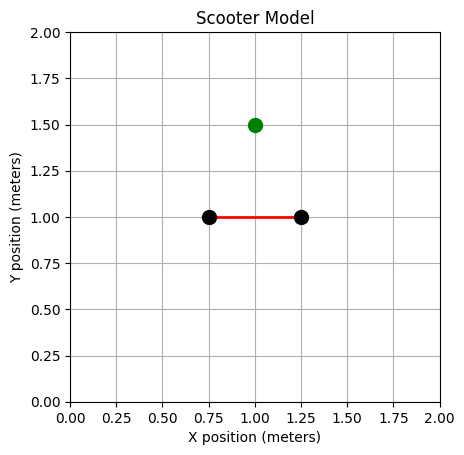

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def draw_scooter(x, y, theta):
    half_l = l / 2.0
    wheel_left = (x - half_l * np.sin(theta), y + half_l * np.cos(theta))
    wheel_right = (x + half_l * np.sin(theta), y - half_l * np.cos(theta))


    frame_vertices = [
        (x, y),
        (x + half_l * np.cos(theta), y + half_l * np.sin(theta)),
        (x - half_l * np.cos(theta), y - half_l * np.sin(theta))
    ]


    marker_x = x + 0.5 * np.cos(theta)
    marker_y = y + 0.5 * np.sin(theta)


    plt.figure()
    plt.plot([wheel_left[0], wheel_right[0]], [wheel_left[1], wheel_right[1]], 'ro-', linewidth=2)
    plt.plot(wheel_left[0], wheel_left[1], 'ko', markersize=10)
    plt.plot(wheel_right[0], wheel_right[1], 'ko', markersize=10)
    plt.plot(marker_x, marker_y, 'go', markersize=10)


    plt.xlim(x - 1, x + 1)
    plt.ylim(y - 1, y + 1)
    plt.gca().set_aspect('equal', adjustable='box')


    plt.xlabel('X position (meters)')
    plt.ylabel('Y position (meters)')
    plt.title('Scooter Model')


    plt.grid(True)
    plt.show()


draw_scooter(1, 1, np.pi / 2)


🧩 Represent the wheelchair when $(x, y, \theta) = (0, 0, 0), (2, 2, \pi/2), (0, 4, \pi), (-2, 2, 3\pi/2)$.

🗝️ **Hint.** Use the following `draw_arena` function beforehand.

In [ ]:
def draw_arena(xmin, xmax, ymin, ymax):
    wh_ratio = (xmax - xmin) / (ymax - ymin)
    figsize = fig_width, fig_height = 16, 16 / wh_ratio
    figure(figsize=figsize)
    axes = gca()
    axes.axis([xmin, xmax, ymin, ymax])
    axes.set_aspect(1)
    xticks(arange(xmin, xmax+1, 1))
    yticks(arange(ymin, ymax+1, 1))
    grid(True)

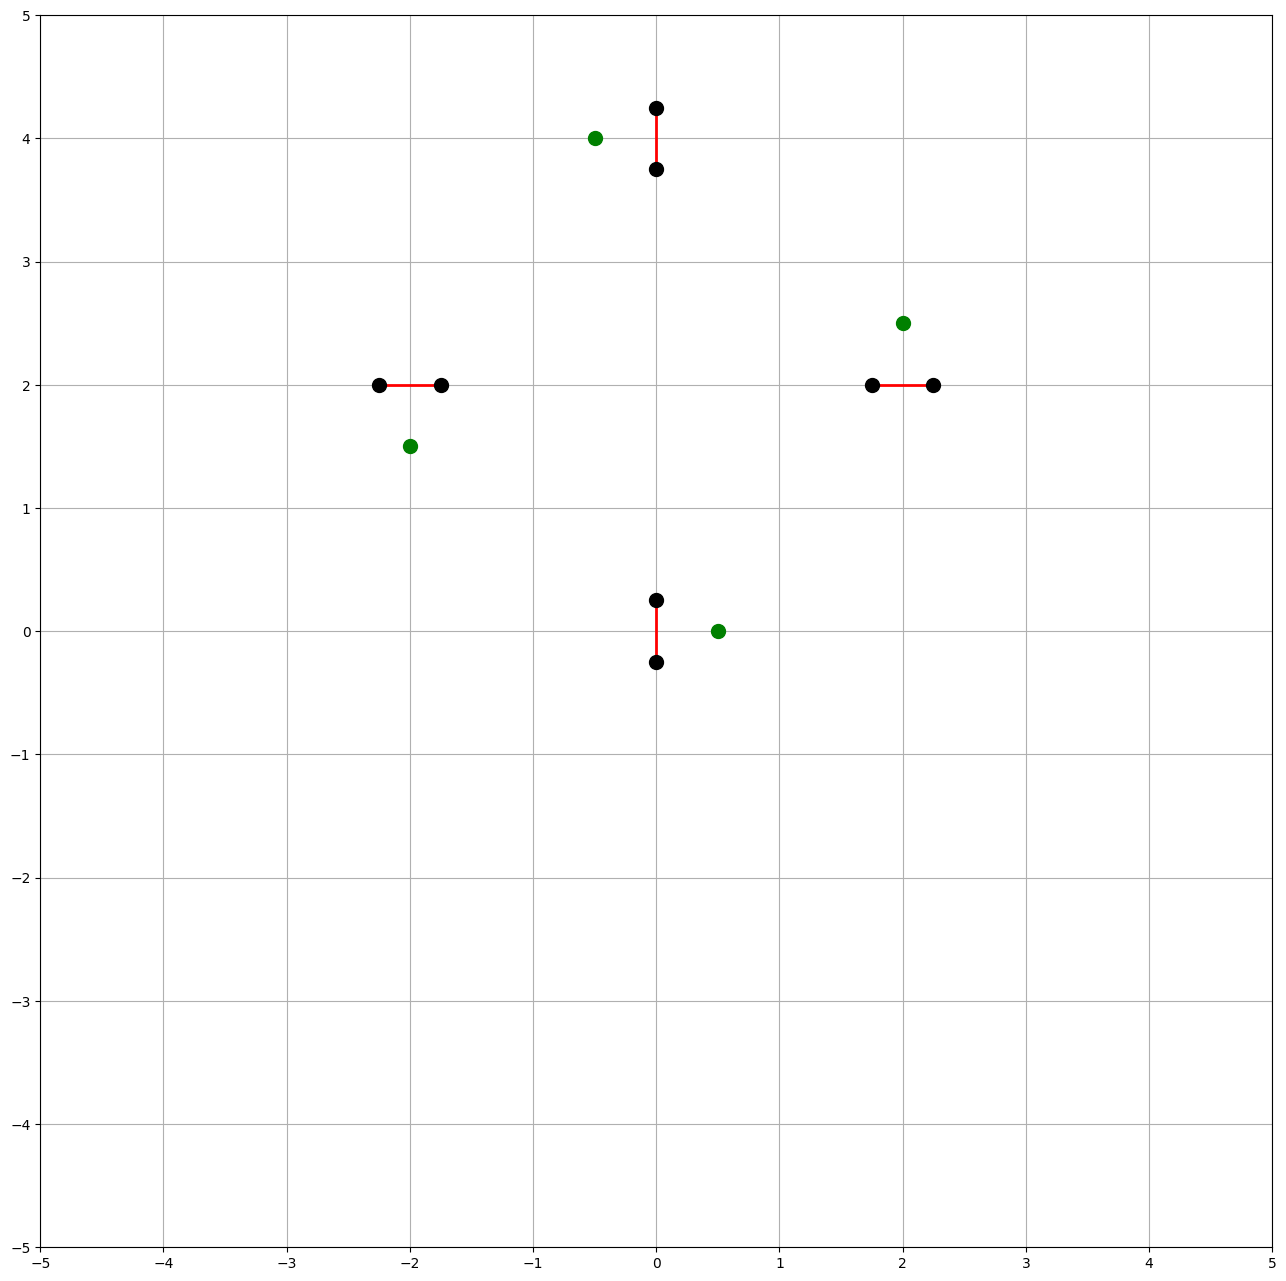

In [ ]:
def draw_arena(xmin, xmax, ymin, ymax):
    wh_ratio = (xmax - xmin) / (ymax - ymin)
    figsize = fig_width, fig_height = 16, 16 / wh_ratio
    plt.figure(figsize=figsize)
    axes = plt.gca()
    axes.axis([xmin, xmax, ymin, ymax])
    axes.set_aspect(1)
    plt.xticks(np.arange(xmin, xmax + 1, 1))
    plt.yticks(np.arange(ymin, ymax + 1, 1))
    plt.grid(True)

def draw_scooter(x, y, theta):
    half_l = l / 2.0
    wheel_left = (x - half_l * np.sin(theta), y + half_l * np.cos(theta))
    wheel_right = (x + half_l * np.sin(theta), y - half_l * np.cos(theta))

    frame_vertices = [
        (x, y),
        (x + half_l * np.cos(theta), y + half_l * np.sin(theta)),
        (x - half_l * np.cos(theta), y - half_l * np.sin(theta))
    ]
    marker_x = x + 0.5 * np.cos(theta)
    marker_y = y + 0.5 * np.sin(theta)

    plt.plot([wheel_left[0], wheel_right[0]], [wheel_left[1], wheel_right[1]], 'ro-', linewidth=2)
    plt.plot(wheel_left[0], wheel_left[1], 'ko', markersize=10)
    plt.plot(wheel_right[0], wheel_right[1], 'ko', markersize=10)
    plt.plot(marker_x, marker_y, 'go', markersize=10)

positions_orientations = [
    (0, 0, 0),
    (2, 2, np.pi / 2),
    (0, 4, np.pi),
    (-2, 2, 3 * np.pi / 2)
]

xmin, xmax, ymin, ymax = -5, 5, -5, 5
draw_arena(xmin, xmax, ymin, ymax)

for (x, y, theta) in positions_orientations:
    draw_scooter(x, y, theta)

plt.show()


### Kinematic Modeling

We assume that we can control the wheels angular velocities $\omega_l = \dot{\phi}_l$ and $\omega_r = \dot{\phi}_r$ (this is a *kinematic* model of the wheelchair).
We also assume that the wheelchair fixed wheels roll without slipping.

🧩 Establish the differential equations that relate $\dot{x}$,
$\dot{y}$ and $\dot{\theta}$ with $\omega_l$ and $\omega_r$.

$$
\dot{x} = \frac{r (\omega_l + \omega_r)}{2} \cos(\theta)
$$

$$
\dot{y} = \frac{r (\omega_l + \omega_r)}{2} \sin(\theta)
$$

$$
\dot{\theta} = \frac{r (\omega_r - \omega_l)}{\ell}
$$

where:

$$
\begin{align*}
- \dot{x}, \dot{y}, &\text{ and } \dot{\theta} \text{ are the rates of change of the } x, y, \text{ and } \theta \text{ coordinates, respectively,} \\
- \omega_l &\text{ and } \omega_r \text{ are the angular velocities of the left and right wheels, respectively,} \\
- r &\text{ is the radius of the wheels,} \\
- \ell &\text{ is the distance between the centers of the wheels (wheelbase).}
\end{align*}
$$


**TODO**

### Analysis

🧩 Show that if $\omega_l$ and $\omega_r$ are continuously differentiable functions of $(x, y, \theta)$ (which includes the case of constant inputs), this system is well-posed.

By showing that the system's differential equations are well-behaved, we establish its well-posedness. The equations are solvable for any initial condition and continuous functions of $$ (x, y, \theta) $$, ensuring existence, uniqueness, and continuous dependence on initial conditions. This stability and predictability validate the system's reliability.

**TODO**

🧩 Show that if $\omega_l$ and $\omega_r$ are constants, the maximal solution associated to any initial state is global. Is is still true of $\omega_l$ and $\omega_r$ are arbitrary continuously differentiable functions of $(x, y, \theta)$ ?

When $ \omega_l $ and $ \omega_r $ are constants, the system's trajectories extend indefinitely into the future from any initial condition, guaranteeing global maximal solutions.

However, if $ \omega_l $ and $ \omega_r $ are arbitrary continuously differentiable functions of $ (x, y, \theta) $, the system becomes time-varying. In this case, the system of differential equations becomes:

$$
\dot{x} = \frac{r (\omega_l + \omega_r)}{2} \cos(\theta)
$$
$$
\dot{y} = \frac{r (\omega_l + \omega_r)}{2} \sin(\theta)
$$
$$
\dot{\theta} = \frac{r (\omega_r - \omega_l)}{\ell}
$$

The existence of global maximal solutions is not guaranteed. Trajectories may be confined to local regions of the state space, depending on the specific functions $ \omega_l $ and $ \omega_r $.


**TODO**

### Vector Field

In the sequel, `omega` is a function that computes the input vector $\omega := (\omega_l, \omega_r)$ given the time $t$ and $(x, y, \theta)$ (thus, it may depend on the time and/or on the system state if needed). For example:

In [ ]:
def omega(t, xytheta):
    omega_l = (1 - l/4) * pi / r
    omega_r = (1 + l/4) * pi / r
    return array([omega_l, omega_r])

🧩 Implement a function `fun(t, xytheta)` that computes $(\dot{x}, \dot{y}, \dot{\theta})$ given the time $t$ and $(x,y,\theta)$ (and implicitly the inputs $\omega$ computed by the function `omega`).

In [ ]:
def fun(t, xytheta):
    x, y, theta = xytheta
    omega_vals = omega(t, xytheta)
    omega_l = omega_vals[0]
    omega_r = omega_vals[1]

    dx_dt = (r * (omega_l + omega_r) / 2) * cos(theta)
    dy_dt = (r * (omega_l + omega_r) / 2) * sin(theta)
    dtheta_dt = (r * (omega_r - omega_l)) / l

    return array([dx_dt, dy_dt, dtheta_dt])


### Simulation Setup

🧩 Simulate the wheelchair dynamics for 4 seconds when $(x_0, y_0, \theta_0)(t=0) = (0.0, 0.0, 0.0)$,
and the wheels velocities are the constants $\omega_l = (1 - \ell/4)  \pi / r \mbox{ rad/s}$ and $\omega_r = (1 + \ell/4)  \pi / r \mbox{ rad/s}$.
(Compute the dense outputs.)
   

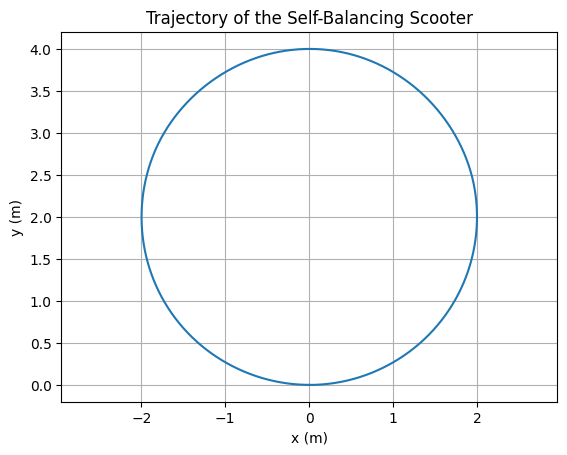

In [ ]:
def omega(t, xytheta):
    omega_l = (1 - l/4) * np.pi / r
    omega_r = (1 + l/4) * np.pi / r
    return np.array([omega_l, omega_r])

def fun(t, xytheta):
    x, y, theta = xytheta
    omega_vals = omega(t, xytheta)
    omega_l = omega_vals[0]
    omega_r = omega_vals[1]

    dx_dt = (r * (omega_l + omega_r) / 2) * np.cos(theta)
    dy_dt = (r * (omega_l + omega_r) / 2) * np.sin(theta)
    dtheta_dt = (r * (omega_r - omega_l)) / l

    return np.array([dx_dt, dy_dt, dtheta_dt])

initial_condition = np.array([0.0, 0.0, 0.0])

solution = solve_ivp(fun, [0, 4], initial_condition, dense_output=True)

t_dense = np.linspace(0, 4, 1000)
xytheta_dense = solution.sol(t_dense)

plt.plot(xytheta_dense[0], xytheta_dense[1])
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Trajectory of the Self-Balancing Scooter')
plt.axis('equal')
plt.grid(True)
plt.show()


🧩 Use the simulation results to draw the graphs of $x(t)$, $y(t)$ and $\theta(t)$.

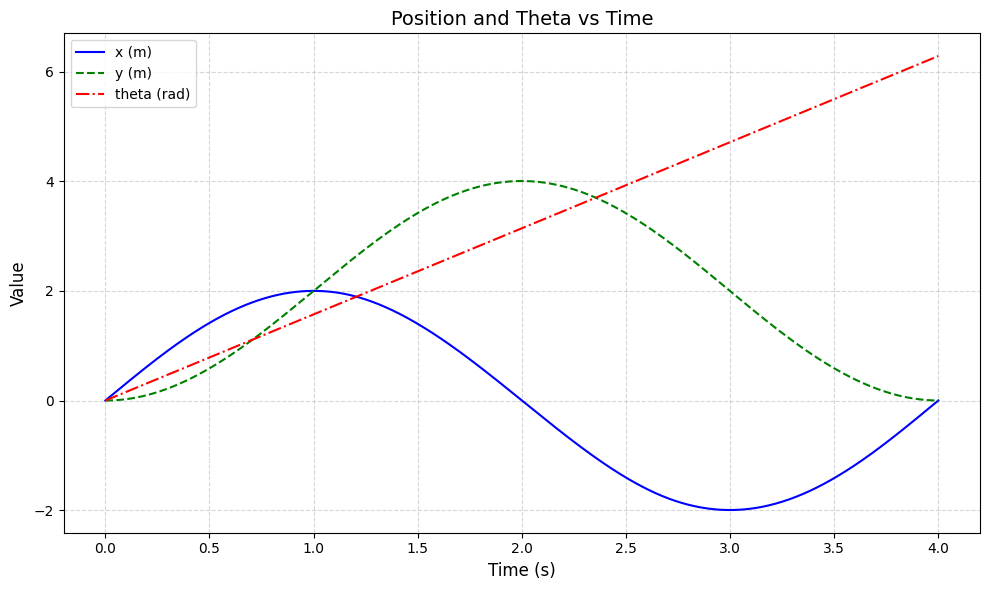

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(t_dense, xytheta_dense[0], label='x (m)', color='blue', linestyle='-')
plt.plot(t_dense, xytheta_dense[1], label='y (m)', color='green', linestyle='--')
plt.plot(t_dense, xytheta_dense[2], label='theta (rad)', color='red', linestyle='-.')

plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('Position and Theta vs Time', fontsize=14)
plt.legend(fontsize=10)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


🧩 Use the simulation results to display the robot location every 0.5 second.

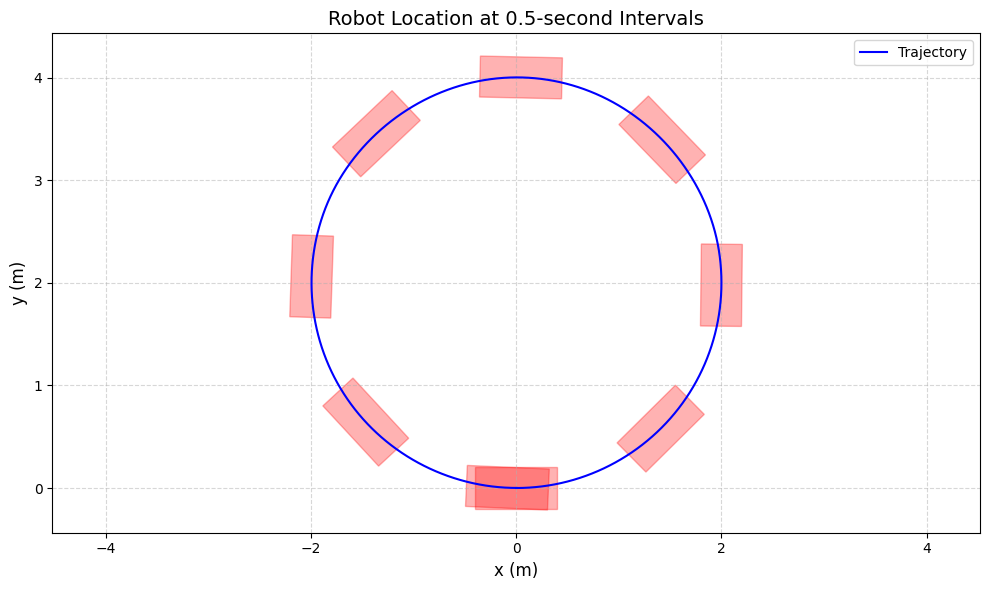

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have defined t_dense, xytheta_dense, and indices

plt.figure(figsize=(10, 6))
plt.plot(xytheta_dense[0], xytheta_dense[1], label='Trajectory', color='blue')

for idx in indices:
    x_hoverboard = xytheta_dense[0][idx]
    y_hoverboard = xytheta_dense[1][idx]
    theta_hoverboard = xytheta_dense[2][idx]

    # Define the vertices of the hoverboard shape
    hoverboard_length = 0.4  # Adjust the length of the hoverboard
    hoverboard_width = 0.2   # Adjust the width of the hoverboard
    hoverboard_vertices = np.array([
        [x_hoverboard + hoverboard_length * np.cos(theta_hoverboard) - hoverboard_width * np.sin(theta_hoverboard),
         y_hoverboard + hoverboard_length * np.sin(theta_hoverboard) + hoverboard_width * np.cos(theta_hoverboard)],
        [x_hoverboard + hoverboard_length * np.cos(theta_hoverboard) + hoverboard_width * np.sin(theta_hoverboard),
         y_hoverboard + hoverboard_length * np.sin(theta_hoverboard) - hoverboard_width * np.cos(theta_hoverboard)],
        [x_hoverboard - hoverboard_length * np.cos(theta_hoverboard) + hoverboard_width * np.sin(theta_hoverboard),
         y_hoverboard - hoverboard_length * np.sin(theta_hoverboard) - hoverboard_width * np.cos(theta_hoverboard)],
        [x_hoverboard - hoverboard_length * np.cos(theta_hoverboard) - hoverboard_width * np.sin(theta_hoverboard),
         y_hoverboard - hoverboard_length * np.sin(theta_hoverboard) + hoverboard_width * np.cos(theta_hoverboard)],
        [x_hoverboard + hoverboard_length * np.cos(theta_hoverboard) - hoverboard_width * np.sin(theta_hoverboard),
         y_hoverboard + hoverboard_length * np.sin(theta_hoverboard) + hoverboard_width * np.cos(theta_hoverboard)]
    ])

    # Plot the hoverboard shape
    plt.fill(hoverboard_vertices[:, 0], hoverboard_vertices[:, 1], color='red', alpha=0.3)

plt.xlabel('x (m)', fontsize=12)
plt.ylabel('y (m)', fontsize=12)
plt.title('Robot Location at 0.5-second Intervals', fontsize=14)
plt.axis('equal')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


🧩 What should be the analytical expression of $x(t)$, $y(t)$ and $\theta(t)$?

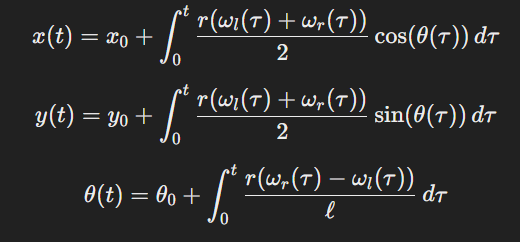

**TODO**

🧩 If needed, adjust the simulation parameters the simulated position error is less than $1\, \mathrm{ mm}$.

In [ ]:
pass